In [2]:
from datasets import load_dataset, load_from_disk, DatasetDict, Dataset
path = "/home/allanz/data/datasets/v3.1_spatial_grid_multimodal"
dataset = load_from_disk(path)


In [3]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'prompt', 'conversations', 'image'],
        num_rows: 100000
    })
    validation: Dataset({
        features: ['text', 'prompt', 'conversations', 'image'],
        num_rows: 1000
    })
    test: Dataset({
        features: ['text', 'prompt', 'conversations', 'image'],
        num_rows: 1000
    })
})

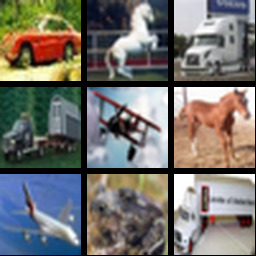

The grid above is size 3 by 3. Each cell contains an object from ['airplane', 'horse', 'automobile', 'truck', 'frog'].
What object is in row 2, column 2?A: truck
What object is in row 2, column 1?A: frog
What object is in row 2, column 0?A: airplane
What object is in row 1, column 2?A: horse
What object is in row 0, column 2?A: truck
What object is in row 0, column 1?A: horse
What object is in row 0, column 0?A: automobile
What object is in row 1, column 1?A: airplane
What object is in row 1, column 0?A: truck
| automobile | horse | truck |
| truck | airplane | horse |
| airplane | frog | truck |
The grid above is size 3 by 3. Each cell contains an object from ['airplane', 'horse', 'automobile', 'truck', 'frog'].
What object is in row 2, column 2? A: truck
What object is in row 2, column 1? A: frog
What object is in row 2, column 0? A: airplane
What object is in row 1, column 2? A: horse
What object is in row 0, column 2? A: truck
What object is in row 0, column 1? A: horse
What object

In [5]:
import random
from PIL import Image

randint = random.randint(0, 1000)
display(Image.open(dataset['test'][randint]["image"]))
print(dataset['test'][randint]["prompt"])
for conv in dataset["test"][randint]["conversations"]:
    print(conv[0] + conv[1])
print(dataset['test'][randint]["text"])

In [13]:
img = Image.open(dataset['test'][randint]["image"])

In [14]:
from lmm_synthetic.mm_train.utils import load_vision_encoder
from torchvision import transforms as T 

_, image_transforms, _ = load_vision_encoder("clip")

resize = T.Resize((224, 224))
img_resized = resize(img)
print(img_resized.size)

2025-01-07 17:13:23.795 | INFO     | lmm_synthetic.mm_train.utils:load_vision_encoder:26 - Loading vision encoder: clip
2025-01-07 17:13:23.797 | INFO     | lmm_synthetic.mm_train.utils:load_vision_encoder:29 - Using CLIP model as the vision encoder
/home/allanz/miniconda3/envs/vlm/lib/python3.10/site-packages/huggingface_hub/file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


(224, 224)


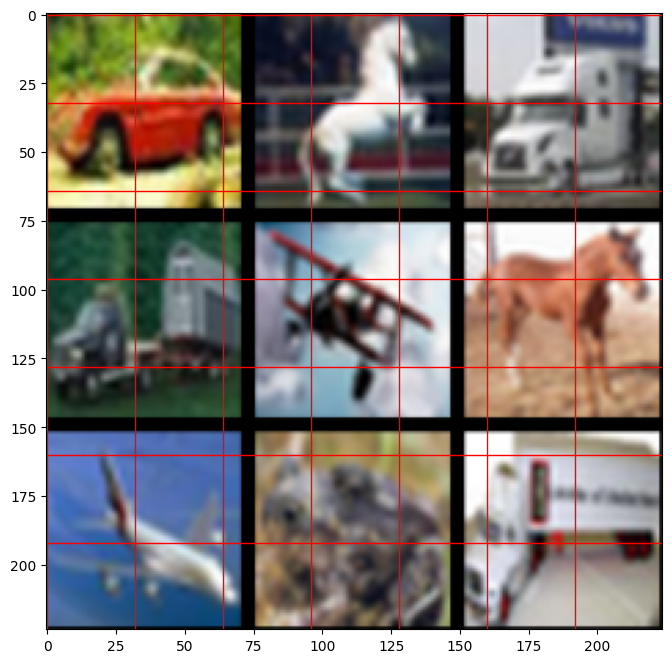

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Convert the image to a numpy array
img_array = np.array(img_resized)

# Create a figure and axis
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# Display the image
ax.imshow(img_array)

# Draw red lines for 32x32 patches
patch_size = 32
for i in range(0, img_resized.size[0], patch_size):
    ax.axhline(i, color='red', linewidth=1)
    ax.axvline(i, color='red', linewidth=1)

# Show the plot
plt.show()